# Import Library

In [11]:
import pandas as pd
import numpy as np  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# methods

In [4]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

# Use GPU

In [22]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')

# Data read

In [3]:
train_x = np.load('data/train_x.npy')
test_x = np.load('data/test_x.npy')
val_x = np.load('data/valid_x.npy')
train_y = np.load('data/train_y.npy')
test_y = np.load('data/test_y.npy')
val_y = np.load('data/valid_y.npy')

# Image Normalization

In [15]:
train_x = image_normalization(train_x)
test_x = image_normalization(train_x)
val_x = image_normalization(train_x)

# Plot Random Image

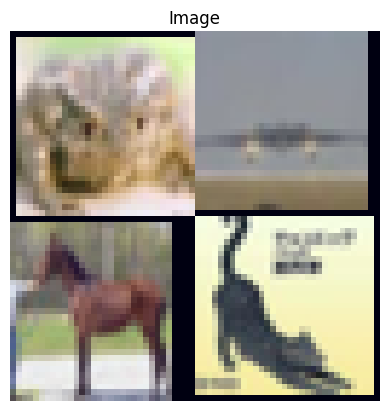

3


In [40]:
Random_Num = np.random.randint(0,(len(train_x)-1))
img = train_x[Random_Num]
img = img.transpose(1, 2, 0) 

plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()
print(train_y[Random_Num])

In [41]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(4, activation='softmax'))  # Assuming 10 classes for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
X_train = train_x.transpose((0, 2, 3, 1))

In [43]:
y_train_encoded = to_categorical(train_y, num_classes=4)

In [44]:
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1125/1125 [==============================] - 11s 9ms/step - loss: 1.3867 - accuracy: 0.2476 - val_loss: 1.3863 - val_accuracy: 0.2560
Epoch 2/10
 261/1125 [=====>........................] - ETA: 9s - loss: 1.3867 - accuracy: 0.2433

KeyboardInterrupt: 